# 02-peak-local-max.ipynb
This notebook is similar continues the segmentation procedure outline in `README.md`, with a different step for determing the local maxima. 
Steps performed here include:
- [Load data](#load-data)
- [Calculate local maxima for foreground seed](#calculate-local-maxima-for-foreground-seeds)
- [Calculate local maxima of gradient for background seeds](#calculate-local-maxima-of-gradient-for-background-seeds)

Note: This NB uses `napari` as an image viewer. If you would rather not use `napari`, see NB 01 for a way to view images using `matplotlib.pyplot` instead.

# Import packages

In [5]:
# Standard library imports
from pathlib import Path
import sys
# Third-party imports
import imagecodecs  # dependency required for loading compressed tif images
import imageio as iio
import napari
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature, filters, morphology, util

# Load data

In [8]:
# open napari viewer
viewer = napari.Viewer()

In [6]:
project_dir = Path('..').resolve()
print(project_dir)

C:\Users\gusb\Research\mhe-analysis


img.shape=(1004, 924)
img.dtype=dtype('uint16')


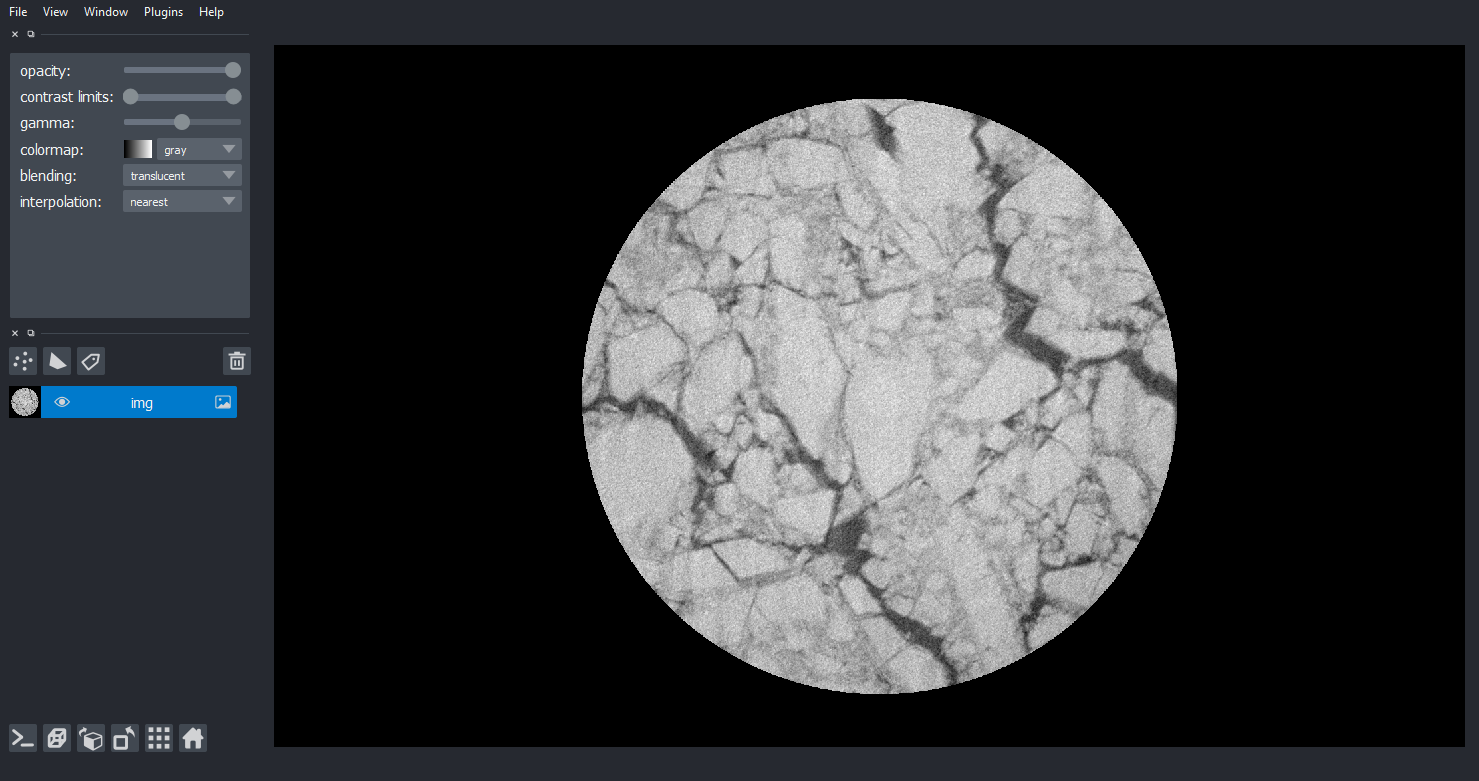

In [14]:
img_path = Path(project_dir / 'IDOX_500.tif')   
img = iio.imread(img_path)
print(f'{img.shape=}')
print(f'{img.dtype=}')
viewer.add_image(img)
napari.utils.nbscreenshot(viewer)

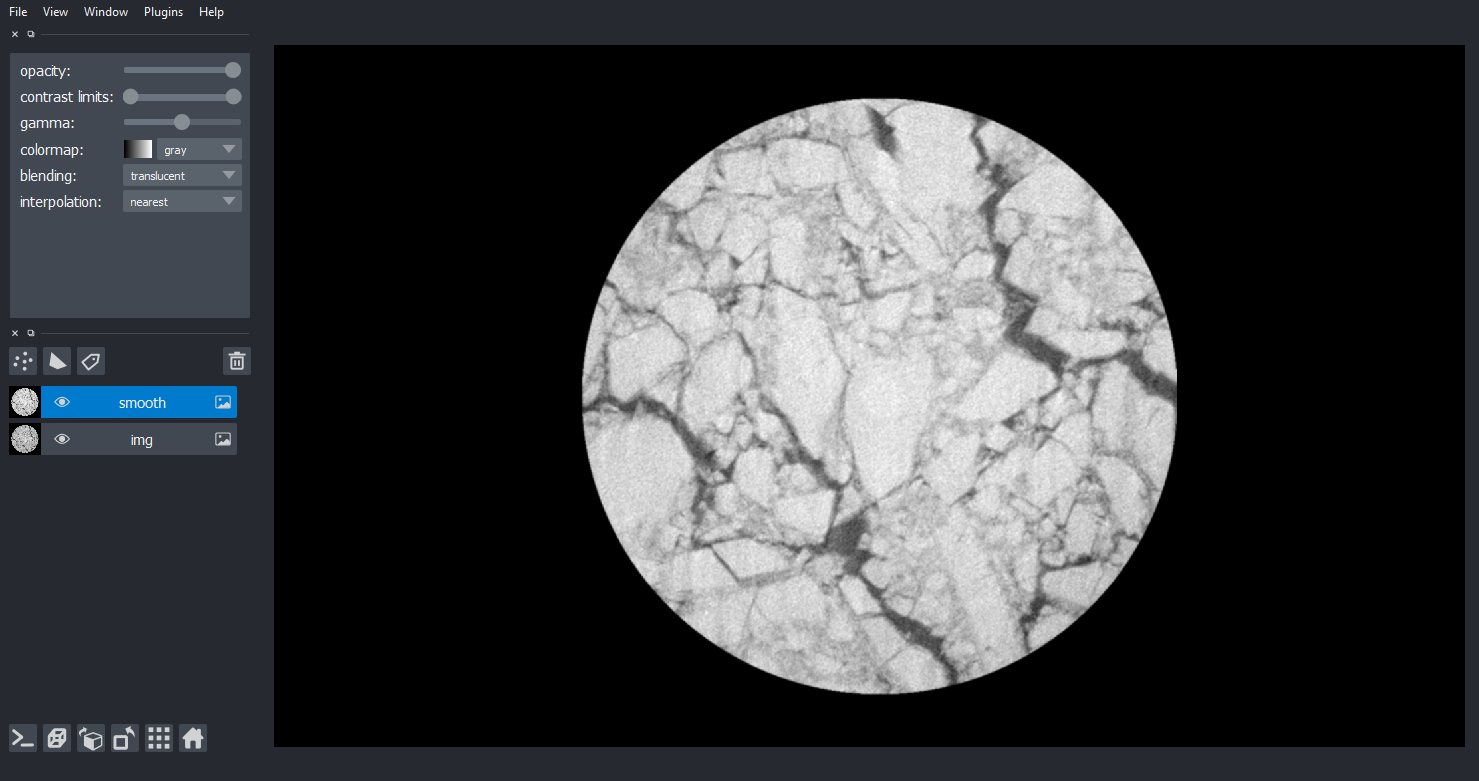

In [15]:
smooth = filters.gaussian(img)
viewer.add_image(smooth)
napari.utils.nbscreenshot(viewer)

# Calculate local maxima for foreground seeds

For some reason it didn't show up in Google searches, but I finally found an h-maxima algorithm for determining local maxima in `skimage` within the `morphology` submodule.

In [20]:
def get_h_max(img, h, viewer):
    h_max = morphology.h_maxima(img, 5)
    viewer.add_image(h_max, name=f'h_max: {h=}')
    return napari.utils.nbscreenshot(viewer)

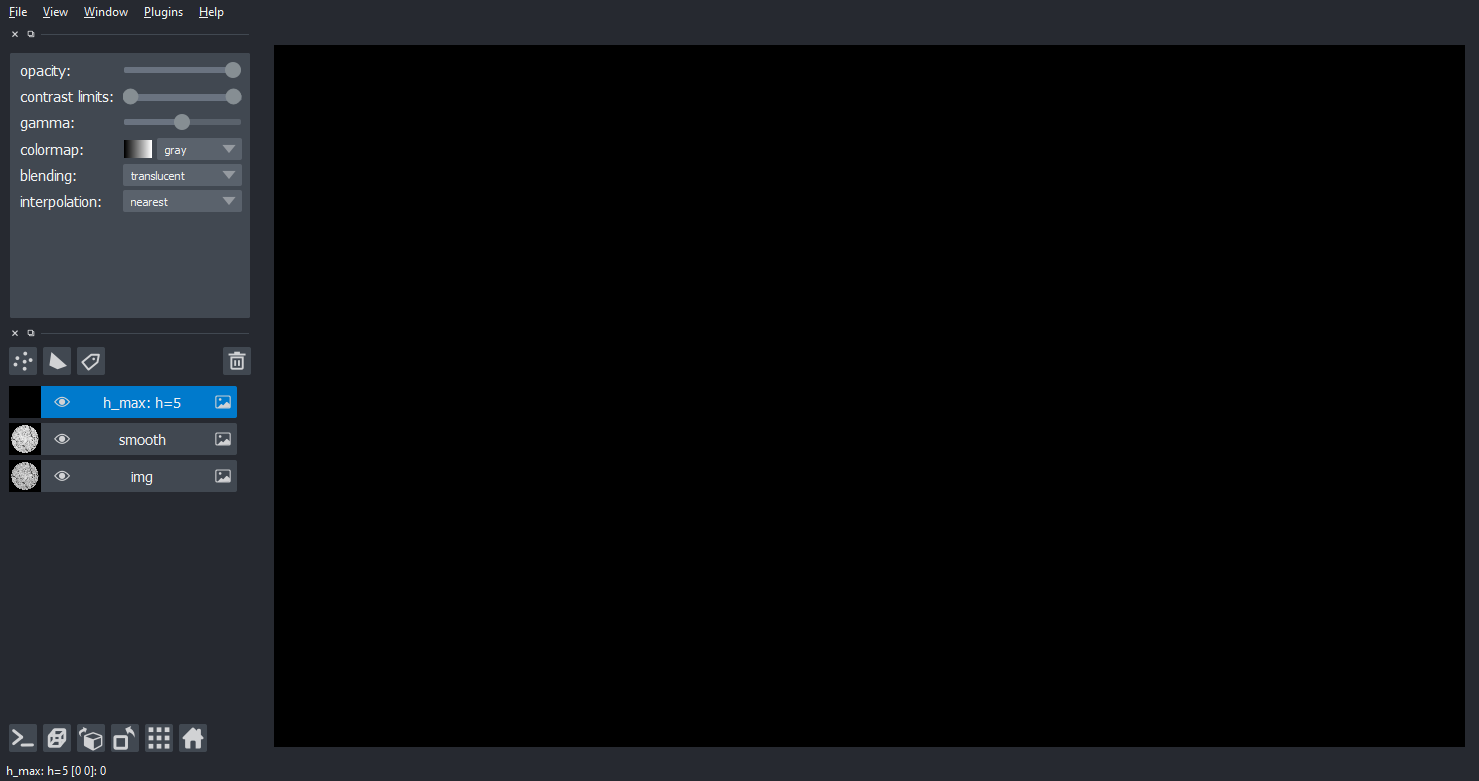

In [21]:
get_h_max(smooth, 5, viewer)

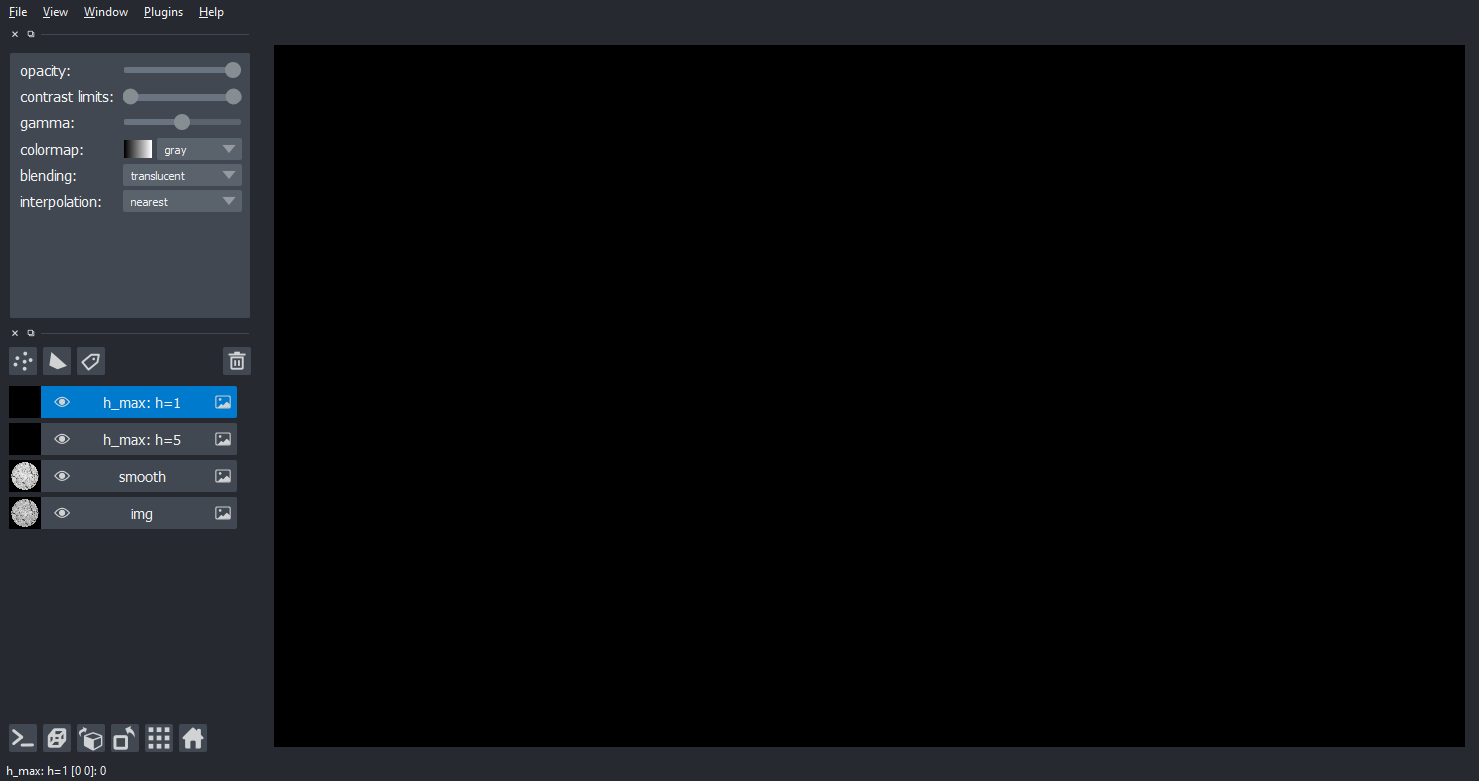

In [22]:
get_h_max(smooth, 1, viewer)